In [1]:
! pip install xgboost
! pip install keras
! pip install tensorflow
import pandas as pd                                                               # MAMADOU SALIOU DIALLO
import seaborn as sns                                                             # AGA Tangenssé Webana Julien
from sklearn.model_selection import train_test_split                              # ALIOU BA 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
'''%sql
SELECT * FROM `masterdata_p`.`default`.`books`;'''
pd_df1 = pd.read_csv(r"C:\Users\S.Diallo\Downloads\books.csv", error_bad_lines=False)
#pd_df1 = pd.read_csv(r"C:\Users\S.Diallo\Downloads\books.csv", sep = ';')

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [188]:
# DataFrame 
pd_df1

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [155]:
pd_df1.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [190]:
pd_df1.tail(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença
11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [191]:
pd_df1.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [192]:
print(pd_df1.columns)


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [193]:
#Remove spaces at the beginning and end of column names
pd_df1.columns = pd_df1.columns.str.strip()


In [194]:
pd_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [195]:
# Null values verification
pd_df1.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [196]:
# Check duplicates values 
pd_df1.duplicated().any()

False

Text(0, 0.5, 'Frequency')

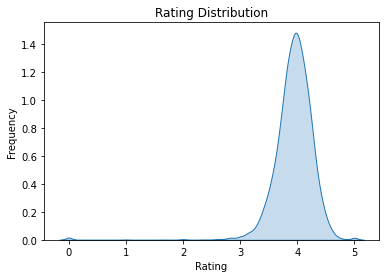

In [165]:
# Average ratings distribution
import seaborn as sns
sns.kdeplot(pd_df1['average_rating'], fill = True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

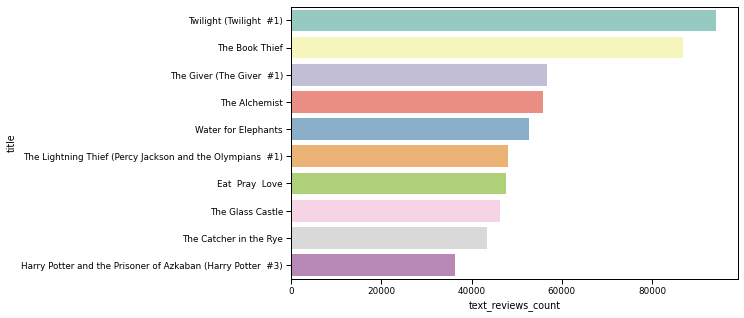

In [286]:
# Books with more written text reviews
most_reviews = pd_df1.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(8,5))
sns.barplot(x=most_reviews['text_reviews_count'],y= most_reviews.index, palette='Set3')


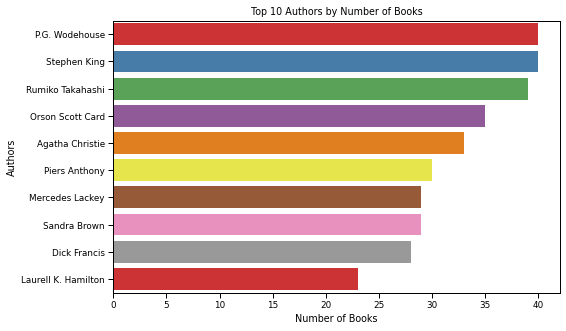

In [287]:
# Let's visualize the top 10 authors in our dataset based on the number of books they have authored.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plot = sns.countplot(
    y="authors",
    data=pd_df1,
    order=pd_df1["authors"].value_counts().iloc[:10].index,
    palette="Set1"
)
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.title("Top 10 Authors by Number of Books")
plt.show()


Text(0.5, 0, 'Total Rating')

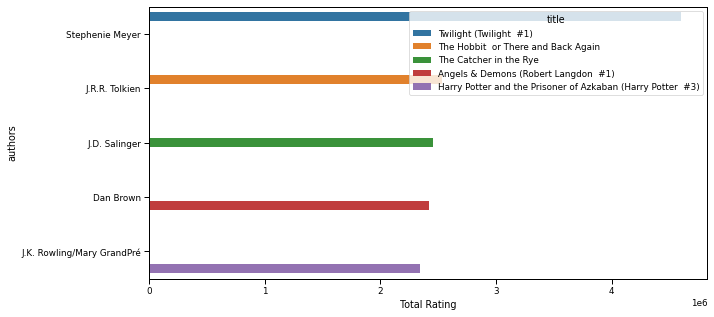

In [199]:
# Let's identify the authors whose books have received the highest ratings count.
plt.figure(figsize=(10, 5))
a = pd_df1.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(x=a['ratings_count'], y=a.index, ci = None, hue = a['title'])
plt.xlabel('Total Rating')

<Figure size 576x360 with 0 Axes>

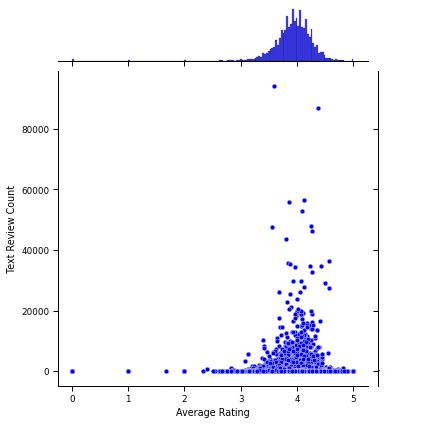

In [200]:
# Distribution between Rating and Text Reviews
plt.figure(figsize=(8,5))
pd_df1.dropna(0, inplace=True)
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="text_reviews_count", kind="scatter", data=pd_df1[['text_reviews_count', 'average_rating']], color="b")  # Assurez-vous de fermer la parenthèse ici
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()


<AxesSubplot:>

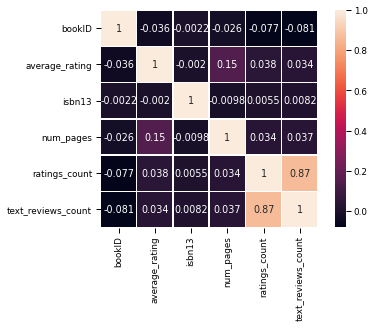

In [201]:
sns.heatmap(data=pd_df1.corr(),
linewidths=0.5, square=True,
linecolor="white", annot=True)


In [204]:
# Let's take a look at the 10 top-rated books.
top_rated = pd_df1.sort_values(by="ratings_count", ascending = False).head(10)
top_rated_titles = pd.DataFrame(top_rated.title).join(pd.DataFrame(top_rated.ratings_count))
top_rated_titles

,title,ratings_count
10336,Twilight (Twilight #1),4597666
1697,The Hobbit or There and Back Again,2530894
1462,The Catcher in the Rye,2457092
307,Angels & Demons (Robert Langdon #1),2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,2293963
1,Harry Potter and the Order of the Phoenix (Har...,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,2128944
2114,Animal Farm,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,2095690


In [205]:
#Select the relevant columns for linear regression
selected_columns = ['authors', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'average_rating', 'publication_date'] 

In [206]:
#Create a DataFrame with the selected columns from pd_df1
pd_df1_selected = pd_df1[selected_columns]


In [208]:
#Convert the 'publication_date' column to date format using various formats
pd_df1_selected['publication_date'] = pd.to_datetime(pd_df1_selected['publication_date'], errors='coerce', format='%m/%d/%Y')
pd_df1_selected['publication_month'] = pd_df1_selected['publication_date'].dt.month
pd_df1_selected['publication_day'] = pd_df1_selected['publication_date'].dt.day
pd_df1_selected['publication_year'] = pd_df1_selected['publication_date'].dt.year


#Display the updated DataFrame
print(pd_df1_selected)

                                                 authors language_code  \
0                             J.K. Rowling/Mary GrandPré           eng   
1                             J.K. Rowling/Mary GrandPré           eng   
2                                           J.K. Rowling           eng   
3                             J.K. Rowling/Mary GrandPré           eng   
4                             J.K. Rowling/Mary GrandPré           eng   
...                                                  ...           ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...           eng   
11119                                William T. Vollmann           eng   
11120                                William T. Vollmann           eng   
11121                                William T. Vollmann           eng   
11122                                         Mark Twain           spa   

       num_pages  ratings_count  text_reviews_count  average_rating  \
0            652        2095690         

<ipython-input-208-adfa2385ffde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df1_selected['publication_date'] = pd.to_datetime(pd_df1_selected['publication_date'], errors='coerce', format='%m/%d/%Y')
<ipython-input-208-adfa2385ffde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df1_selected['publication_month'] = pd_df1_selected['publication_date'].dt.month
<ipython-input-208-adfa2385ffde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [20]:
pd_df1_selected['publication_month'] = pd_df1_selected['publication_month'].fillna(0).astype(int)
pd_df1_selected['publication_day'] = pd_df1_selected['publication_day'].fillna(0).astype(int)
pd_df1_selected['publication_year'] = pd_df1_selected['publication_year'].fillna(0).astype(int)



<ipython-input-20-0da2699fcd8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df1_selected['publication_month'] = pd_df1_selected['publication_month'].fillna(0).astype(int)
<ipython-input-20-0da2699fcd8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df1_selected['publication_day'] = pd_df1_selected['publication_day'].fillna(0).astype(int)
<ipython-input-20-0da2699fcd8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [21]:
pd_df1_selected

,authors,language_code,num_pages,ratings_count,text_reviews_count,average_rating,publication_date,publication_month,publication_day,publication_year
0,J.K. Rowling/Mary GrandPré,eng,652,2095690,27591,4.57,2006-09-16,9,16,2006
1,J.K. Rowling/Mary GrandPré,eng,870,2153167,29221,4.49,2004-09-01,9,1,2004
2,J.K. Rowling,eng,352,6333,244,4.42,2003-11-01,11,1,2003
3,J.K. Rowling/Mary GrandPré,eng,435,2339585,36325,4.56,2004-05-01,5,1,2004
4,J.K. Rowling/Mary GrandPré,eng,2690,41428,164,4.78,2004-09-13,9,13,2004
...,...,...,...,...,...,...,...,...,...,...
11118,William T. Vollmann/Larry McCaffery/Michael He...,eng,512,156,20,4.06,2004-12-21,12,21,2004
11119,William T. Vollmann,eng,635,783,56,4.08,1988-12-01,12,1,1988
11120,William T. Vollmann,eng,415,820,95,3.96,1993-08-01,8,1,1993
11121,William T. Vollmann,eng,434,769,139,3.72,2007-02-27,2,27,2007


In [22]:
pd_df1_selected.drop('publication_date', axis=1, inplace=True)

C:\Users\S.Diallo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
print(pd_df1_selected)

                                                 authors language_code  \
0                             J.K. Rowling/Mary GrandPré           eng   
1                             J.K. Rowling/Mary GrandPré           eng   
2                                           J.K. Rowling           eng   
3                             J.K. Rowling/Mary GrandPré           eng   
4                             J.K. Rowling/Mary GrandPré           eng   
...                                                  ...           ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...           eng   
11119                                William T. Vollmann           eng   
11120                                William T. Vollmann           eng   
11121                                William T. Vollmann           eng   
11122                                         Mark Twain           spa   

       num_pages  ratings_count  text_reviews_count  average_rating  \
0            652        2095690         

In [31]:
#Perform one-hot encoding for the 'language_code' column
pd_df1_encoded = pd.get_dummies(pd_df1_selected, columns=['language_code'], prefix_sep='')
print(pd_df1_encoded)


                                                 authors  num_pages  \
0                             J.K. Rowling/Mary GrandPré        652   
1                             J.K. Rowling/Mary GrandPré        870   
2                                           J.K. Rowling        352   
3                             J.K. Rowling/Mary GrandPré        435   
4                             J.K. Rowling/Mary GrandPré       2690   
...                                                  ...        ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...        512   
11119                                William T. Vollmann        635   
11120                                William T. Vollmann        415   
11121                                William T. Vollmann        434   
11122                                         Mark Twain        272   

       ratings_count  text_reviews_count  average_rating  language_codeale  \
0            2095690               27591            4.57             

In [29]:
print(pd_df1_encoded.columns)

Index(['authors', 'num_pages', 'ratings_count', 'text_reviews_count',
       'average_rating', 'publication_month', 'publication_day',
       'publication_year', 'language_codeale', 'language_codeara',
       'language_codeen-CA', 'language_codeen-GB', 'language_codeen-US',
       'language_codeeng', 'language_codeenm', 'language_codefre',
       'language_codeger', 'language_codegla', 'language_codeglg',
       'language_codegrc', 'language_codeita', 'language_codejpn',
       'language_codelat', 'language_codemsa', 'language_codemul',
       'language_codenl', 'language_codenor', 'language_codepor',
       'language_coderus', 'language_codespa', 'language_codesrp',
       'language_codeswe', 'language_codetur', 'language_codewel',
       'language_codezho'],
      dtype='object')


In [32]:
pd_df1_encoded

,authors,num_pages,ratings_count,text_reviews_count,average_rating,language_codeale,language_codeara,language_codeen-CA,language_codeen-GB,language_codeen-US,...,language_codenl,language_codenor,language_codepor,language_coderus,language_codespa,language_codesrp,language_codeswe,language_codetur,language_codewel,language_codezho
0,J.K. Rowling/Mary GrandPré,652,2095690,27591,4.57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,J.K. Rowling/Mary GrandPré,870,2153167,29221,4.49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,J.K. Rowling,352,6333,244,4.42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,J.K. Rowling/Mary GrandPré,435,2339585,36325,4.56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,J.K. Rowling/Mary GrandPré,2690,41428,164,4.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,William T. Vollmann/Larry McCaffery/Michael He...,512,156,20,4.06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,William T. Vollmann,635,783,56,4.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,William T. Vollmann,415,820,95,3.96,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,William T. Vollmann,434,769,139,3.72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Create a LabelEncoder for the 'authors' column
author_encoder = LabelEncoder()
pd_df1_encoded['authors_encoded'] = author_encoder.fit_transform(pd_df1_selected['authors'])


In [217]:
print(pd_df1_encoded.columns)

Index(['num_pages', 'ratings_count', 'text_reviews_count', 'language_codeale',
       'language_codeara', 'language_codeen-CA', 'language_codeen-GB',
       'language_codeen-US', 'language_codeeng', 'language_codeenm',
       'language_codefre', 'language_codeger', 'language_codegla',
       'language_codeglg', 'language_codegrc', 'language_codeita',
       'language_codejpn', 'language_codelat', 'language_codemsa',
       'language_codemul', 'language_codenl', 'language_codenor',
       'language_codepor', 'language_coderus', 'language_codespa',
       'language_codesrp', 'language_codeswe', 'language_codetur',
       'language_codewel', 'language_codezho', 'authors_encoded',
       'average_rating_encoded'],
      dtype='object')


In [219]:
pd_df1_selected

,authors,language_code,num_pages,ratings_count,text_reviews_count,average_rating,publication_date,publication_month,publication_day,publication_year
0,J.K. Rowling/Mary GrandPré,eng,652,2095690,27591,4.57,2006-09-16,9.0,16.0,2006.0
1,J.K. Rowling/Mary GrandPré,eng,870,2153167,29221,4.49,2004-09-01,9.0,1.0,2004.0
2,J.K. Rowling,eng,352,6333,244,4.42,2003-11-01,11.0,1.0,2003.0
3,J.K. Rowling/Mary GrandPré,eng,435,2339585,36325,4.56,2004-05-01,5.0,1.0,2004.0
4,J.K. Rowling/Mary GrandPré,eng,2690,41428,164,4.78,2004-09-13,9.0,13.0,2004.0
...,...,...,...,...,...,...,...,...,...,...
11118,William T. Vollmann/Larry McCaffery/Michael He...,eng,512,156,20,4.06,2004-12-21,12.0,21.0,2004.0
11119,William T. Vollmann,eng,635,783,56,4.08,1988-12-01,12.0,1.0,1988.0
11120,William T. Vollmann,eng,415,820,95,3.96,1993-08-01,8.0,1.0,1993.0
11121,William T. Vollmann,eng,434,769,139,3.72,2007-02-27,2.0,27.0,2007.0


In [220]:
pd_df1_encoded

,num_pages,ratings_count,text_reviews_count,language_codeale,language_codeara,language_codeen-CA,language_codeen-GB,language_codeen-US,language_codeeng,language_codeenm,...,language_codepor,language_coderus,language_codespa,language_codesrp,language_codeswe,language_codetur,language_codewel,language_codezho,authors_encoded,average_rating_encoded
0,0.099148,0.455816,0.292696,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.57
1,0.132299,0.468317,0.309988,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.49
2,0.053528,0.001377,0.002588,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.394998,4.42
3,0.066150,0.508864,0.385350,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.56
4,0.409063,0.009011,0.001740,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0.077859,0.000034,0.000212,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987647,4.06
11119,0.096563,0.000170,0.000594,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,4.08
11120,0.063108,0.000178,0.001008,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,3.96
11121,0.065998,0.000167,0.001475,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,3.72


In [223]:
print(pd_df1_encoded.columns)

Index(['num_pages', 'ratings_count', 'text_reviews_count', 'language_codeale',
       'language_codeara', 'language_codeen-CA', 'language_codeen-GB',
       'language_codeen-US', 'language_codeeng', 'language_codeenm',
       'language_codefre', 'language_codeger', 'language_codegla',
       'language_codeglg', 'language_codegrc', 'language_codeita',
       'language_codejpn', 'language_codelat', 'language_codemsa',
       'language_codemul', 'language_codenl', 'language_codenor',
       'language_codepor', 'language_coderus', 'language_codespa',
       'language_codesrp', 'language_codeswe', 'language_codetur',
       'language_codewel', 'language_codezho', 'authors_encoded',
       'average_rating_encoded'],
      dtype='object')


In [228]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Function to encode non-numeric elements and leave numeric ones untouched
def encode_average_rating(value):
    try:
        return float(value)  # If it's a number, return the value directly as a float
    except ValueError:  # If conversion to float fails, it's a non-numeric string
        return label_encoder.fit_transform([value])[0]

# Apply the function to the 'average_rating' column to encode the values
pd_df1_encoded['average_rating_encoded'] = pd_df1_encoded['average_rating_encoded'].apply(encode_average_rating)

# Display the DataFrame with the encoded numeric values
print(pd_df1_encoded)



       num_pages  ratings_count  text_reviews_count  language_codeale  \
0       0.099148       0.455816            0.292696                 0   
1       0.132299       0.468317            0.309988                 0   
2       0.053528       0.001377            0.002588                 0   
3       0.066150       0.508864            0.385350                 0   
4       0.409063       0.009011            0.001740                 0   
...          ...            ...                 ...               ...   
11118   0.077859       0.000034            0.000212                 0   
11119   0.096563       0.000170            0.000594                 0   
11120   0.063108       0.000178            0.001008                 0   
11121   0.065998       0.000167            0.001475                 0   
11122   0.041363       0.000025            0.000127                 0   

       language_codeara  language_codeen-CA  language_codeen-GB  \
0                     0                   0             

In [229]:
pd_df1_encoded

,num_pages,ratings_count,text_reviews_count,language_codeale,language_codeara,language_codeen-CA,language_codeen-GB,language_codeen-US,language_codeeng,language_codeenm,...,language_codepor,language_coderus,language_codespa,language_codesrp,language_codeswe,language_codetur,language_codewel,language_codezho,authors_encoded,average_rating_encoded
0,0.099148,0.455816,0.292696,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.57
1,0.132299,0.468317,0.309988,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.49
2,0.053528,0.001377,0.002588,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.394998,4.42
3,0.066150,0.508864,0.385350,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.56
4,0.409063,0.009011,0.001740,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.395601,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0.077859,0.000034,0.000212,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987647,4.06
11119,0.096563,0.000170,0.000594,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,4.08
11120,0.063108,0.000178,0.001008,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,3.96
11121,0.065998,0.000167,0.001475,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987496,3.72


In [234]:
# Replace empty strings with null values (NaN)
pd_df1_encoded['num_pages'].replace('', pd.NA, inplace=True)

# Convert the column to numeric type
pd_df1_encoded['num_pages'] = pd.to_numeric(pd_df1_encoded['num_pages'], errors='coerce')

# Display the DataFrame with the 'num_pages' column converted to numeric type
print(pd_df1_encoded)




       num_pages  ratings_count  text_reviews_count  language_codeale  \
0       0.099148       0.455816            0.292696                 0   
1       0.132299       0.468317            0.309988                 0   
2       0.053528       0.001377            0.002588                 0   
3       0.066150       0.508864            0.385350                 0   
4       0.409063       0.009011            0.001740                 0   
...          ...            ...                 ...               ...   
11118   0.077859       0.000034            0.000212                 0   
11119   0.096563       0.000170            0.000594                 0   
11120   0.063108       0.000178            0.001008                 0   
11121   0.065998       0.000167            0.001475                 0   
11122   0.041363       0.000025            0.000127                 0   

       language_codeara  language_codeen-CA  language_codeen-GB  \
0                     0                   0             

In [235]:
# Display the data types of columns in the pd_df1_encoded DataFrame
print(pd_df1_encoded.dtypes)



num_pages                 float64
ratings_count             float64
text_reviews_count        float64
language_codeale            uint8
language_codeara            uint8
language_codeen-CA          uint8
language_codeen-GB          uint8
language_codeen-US          uint8
language_codeeng            uint8
language_codeenm            uint8
language_codefre            uint8
language_codeger            uint8
language_codegla            uint8
language_codeglg            uint8
language_codegrc            uint8
language_codeita            uint8
language_codejpn            uint8
language_codelat            uint8
language_codemsa            uint8
language_codemul            uint8
language_codenl             uint8
language_codenor            uint8
language_codepor            uint8
language_coderus            uint8
language_codespa            uint8
language_codesrp            uint8
language_codeswe            uint8
language_codetur            uint8
language_codewel            uint8
language_codez

In [236]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['num_pages', 'ratings_count', 'text_reviews_count', 'authors_encoded']

# Apply normalization to the selected columns
pd_df1_encoded[columns_to_normalize] = scaler.fit_transform(pd_df1_encoded[columns_to_normalize])

# Display the DataFrame with normalized columns
print(pd_df1_encoded)



       num_pages  ratings_count  text_reviews_count  language_codeale  \
0       0.099148       0.455816            0.292696                 0   
1       0.132299       0.468317            0.309988                 0   
2       0.053528       0.001377            0.002588                 0   
3       0.066150       0.508864            0.385350                 0   
4       0.409063       0.009011            0.001740                 0   
...          ...            ...                 ...               ...   
11118   0.077859       0.000034            0.000212                 0   
11119   0.096563       0.000170            0.000594                 0   
11120   0.063108       0.000178            0.001008                 0   
11121   0.065998       0.000167            0.001475                 0   
11122   0.041363       0.000025            0.000127                 0   

       language_codeara  language_codeen-CA  language_codeen-GB  \
0                     0                   0             

In [233]:
correlation_matrix = pd_df1_encoded.corr()
correlation_with_target = correlation_matrix['average_rating_encoded'].sort_values(ascending=False)
print(correlation_with_target)


average_rating_encoded    1.000000
num_pages                 0.150477
language_codejpn          0.061528
language_codezho          0.052910
ratings_count             0.038224
text_reviews_count        0.033663
language_codewel          0.028839
language_codemul          0.022690
authors_encoded           0.021078
language_codelat          0.019649
language_codegla          0.014500
language_codetur          0.013147
language_coderus          0.012280
language_codefre          0.012239
language_codeale          0.011524
language_codeita          0.008709
language_codenl           0.006654
language_codeen-CA        0.006562
language_codemsa          0.004760
language_codeger          0.004333
language_codepor          0.000935
language_codeeng         -0.000079
language_codespa         -0.001922
language_codeenm         -0.002847
language_codeen-GB       -0.004262
language_codenor         -0.009039
language_codeara         -0.010391
language_codeglg         -0.015532
language_codeswe    

In [237]:
# Display the elements of the target variable 'average_rating_encoded'
print(pd_df1_encoded['average_rating_encoded'])

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11118    4.06
11119    4.08
11120    3.96
11121    3.72
11122    3.91
Name: average_rating_encoded, Length: 11123, dtype: float64


In [238]:
print(pd_df1_encoded)
print(pd_df1_encoded.columns)
print(pd_df1_encoded['language_codeeng'])

       num_pages  ratings_count  text_reviews_count  language_codeale  \
0       0.099148       0.455816            0.292696                 0   
1       0.132299       0.468317            0.309988                 0   
2       0.053528       0.001377            0.002588                 0   
3       0.066150       0.508864            0.385350                 0   
4       0.409063       0.009011            0.001740                 0   
...          ...            ...                 ...               ...   
11118   0.077859       0.000034            0.000212                 0   
11119   0.096563       0.000170            0.000594                 0   
11120   0.063108       0.000178            0.001008                 0   
11121   0.065998       0.000167            0.001475                 0   
11122   0.041363       0.000025            0.000127                 0   

       language_codeara  language_codeen-CA  language_codeen-GB  \
0                     0                   0             

In [239]:
# Display the data types of columns in the DataFrame pd_df1_encoded
print(pd_df1_encoded.dtypes)



num_pages                 float64
ratings_count             float64
text_reviews_count        float64
language_codeale            uint8
language_codeara            uint8
language_codeen-CA          uint8
language_codeen-GB          uint8
language_codeen-US          uint8
language_codeeng            uint8
language_codeenm            uint8
language_codefre            uint8
language_codeger            uint8
language_codegla            uint8
language_codeglg            uint8
language_codegrc            uint8
language_codeita            uint8
language_codejpn            uint8
language_codelat            uint8
language_codemsa            uint8
language_codemul            uint8
language_codenl             uint8
language_codenor            uint8
language_codepor            uint8
language_coderus            uint8
language_codespa            uint8
language_codesrp            uint8
language_codeswe            uint8
language_codetur            uint8
language_codewel            uint8
language_codez

In [240]:
# Display the content of the 'num_pages' column in the DataFrame pd_df1_encoded
print(pd_df1_encoded['num_pages'])



0        0.099148
1        0.132299
2        0.053528
3        0.066150
4        0.409063
           ...   
11118    0.077859
11119    0.096563
11120    0.063108
11121    0.065998
11122    0.041363
Name: num_pages, Length: 11123, dtype: float64


In [241]:
# Split the data into independent variables (X) and the target variable (y)
X = pd_df1_encoded.drop('average_rating_encoded', axis=1)  # Independent variables
y = pd_df1_encoded['average_rating_encoded']  # Target variable

In [243]:
print(X)

       num_pages  ratings_count  text_reviews_count  language_codeale  \
0       0.099148       0.455816            0.292696                 0   
1       0.132299       0.468317            0.309988                 0   
2       0.053528       0.001377            0.002588                 0   
3       0.066150       0.508864            0.385350                 0   
4       0.409063       0.009011            0.001740                 0   
...          ...            ...                 ...               ...   
11118   0.077859       0.000034            0.000212                 0   
11119   0.096563       0.000170            0.000594                 0   
11120   0.063108       0.000178            0.001008                 0   
11121   0.065998       0.000167            0.001475                 0   
11122   0.041363       0.000025            0.000127                 0   

       language_codeara  language_codeen-CA  language_codeen-GB  \
0                     0                   0             

In [242]:
y = pd_df1_encoded['average_rating_encoded']        
print(y)

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11118    4.06
11119    4.08
11120    3.96
11121    3.72
11122    3.91
Name: average_rating_encoded, Length: 11123, dtype: float64


In [245]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
# Instead of this (might trigger the warning):
# pd_df1_encoded['num_pages'].replace('', pd.NA, inplace=True)

# Use .loc to modify the DataFrame directly:
pd_df1_encoded.loc[pd_df1_encoded['num_pages'] == '', 'num_pages'] = pd.NA

X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)


In [305]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 30877019095.418633


In [306]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Create the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate the mean squared error
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Calculate the root mean squared error (RMSE)
rmse_tree = np.sqrt(mse_tree)

# Print the RMSE
print("Root Mean Squared Error for Decision Tree:", rmse_tree)



Root Mean Squared Error for Decision Tree: 0.5086307240849162


In [307]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Create the random forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the random forest model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the root mean squared error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Print the RMSE
print("Root Mean Squared Error for Random Forest:", rmse_rf)



Root Mean Squared Error for Random Forest: 0.34318014997365454


In [308]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the mean squared error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the root mean squared error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)

# Print the RMSE
print("Root Mean Squared Error for XGBoost:", rmse_xgb)



Root Mean Squared Error for XGBoost: 0.3436460500308098


In [ ]:
# To conclude, we keep the random forest and XGBoost models 